# IQ modulation to transfer complex signal
- https://mriquestions.com/uploads/3/4/5/7/34572113/quad_signals_tutorial-lyons.pdf
- https://www.markimicrowave.com/blog/how-to-think-about-iq-mixers/ 
- https://www.markimicrowave.com/assets/appnotes/IQ_IR_SSB_Mixer_Primer.pdf
- https://tw.tek.com/blog/what%E2%80%99s-your-iq-%E2%80%93-about-quadrature-signals%E2%80%A6  

In [1]:
import os, sys

def gen_relative_path(target_path): 
    
    def del_same_parents(target_path, current_path):
        if len(target_path) * len(current_path) > 0:
            if target_path[0] == current_path[0]:
                target_path.pop(0)
                current_path.pop(0)
                del_same_parents(target_path, current_path)
            
    current_path = os.getcwd().replace('\\', '/').split('/')
    target_path = target_path.replace('\\', '/').split('/')
    del_same_parents(target_path, current_path)
    
    return ['..'] * len(current_path) + target_path


def append_source_relative_path(source_relative_path):
    sys.path.append(os.sep.join(source_relative_path))

In [2]:
# paths = ['']
# paths = [gen_relative_path(p) for p in paths]
# print(paths)

In [3]:
paths = [['..', '..', '..', '..', '..', 'Waves', 'bitbucket', 'github', 'codes'],
         ['..', 'codes']]

for path in paths:
    append_source_relative_path(path)

In [4]:
%pylab inline

from waves.sound import *
from waves.tools.dsp.mixers.frequency_mixers import *

Populating the interactive namespace from numpy and matplotlib


In [5]:
import warnings 

warnings.filterwarnings('ignore')

In [6]:
def show_pair(sig_left, sig_right, frames = 300):
    sig_left.show(color = 'red', show_frames = slice(0, frames))
    sig_right.show(color = 'green', show_frames = slice(0, frames))
    plt.xticks(rotation = 45)    

## LO

In [7]:
phase_shift = PI2 / 8

In [8]:
freq_lo = int(100e3)

freq_sampling = freq_lo * 8 * 2

In [9]:
duration_seconds = 1
t = np.linspace(0, duration_seconds, duration_seconds * freq_sampling)

## IF

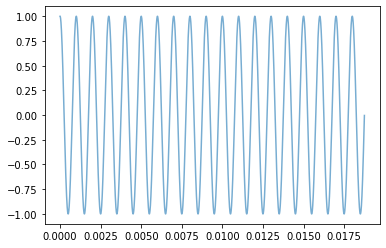

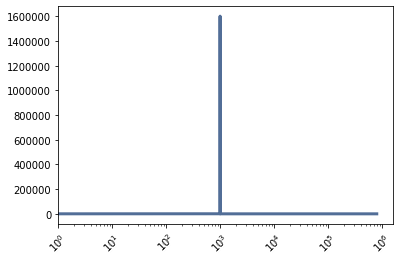

In [10]:
freq_if = 1000

IF = Channel(np.exp(1j * PI2 * freq_if * t), ts = t, framerate = freq_sampling) 
IF.show(show_frames = slice(0, 30000))

# plt.figure()
# plt.plot(np.angle(IF.ys)[:3000], color = 'orange'); 
plt.figure()
IF.make_spectrum().plot(freq_lims = (1, freq_sampling));
plt.xticks(rotation = 45);

In [11]:
# plt.plot(IF.ys.real[:3000])
# plt.plot(IF.ys.imag[:3000])

## Modulation

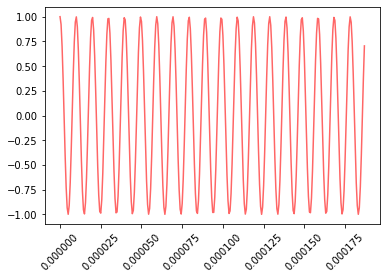

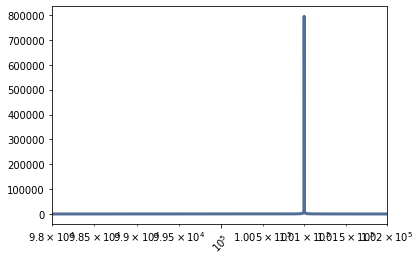

In [12]:
qm = QuadratureMixer(freq = freq_lo)
I, Q, RF = qm.modulate(IF)
# I, Q, RF = qm.modulate(IF.real, IF.imag)

RF.show(color = 'red', show_frames = slice(0, 300))
plt.xticks(rotation = 45);
plt.figure()
RF.make_spectrum().plot(freq_lims = (freq_lo - freq_if * 2 , freq_lo + freq_if * 2));
plt.xticks(rotation = 45);

## De-modulation

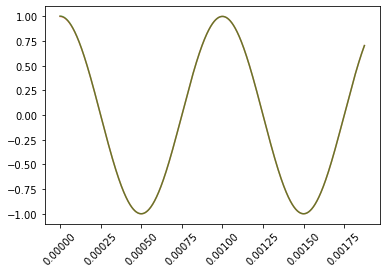

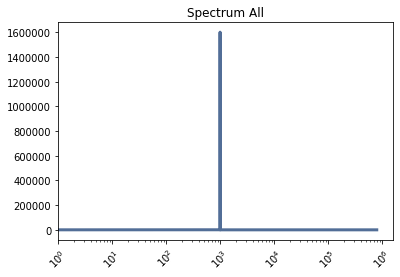

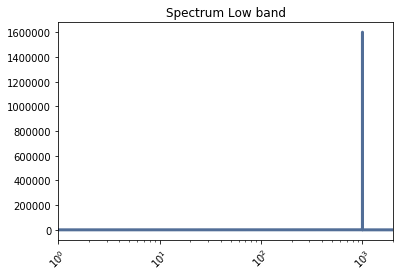

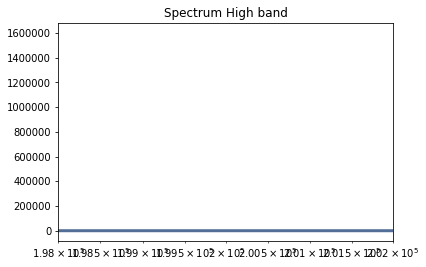

In [13]:
I_reconstructed, Q_reconstructed, IF_reconstructed = qm.demodulate(RF, low_pass_cutoff = freq_if * 2) 
# I_reconstructed, Q_reconstructed, IF_reconstructed = qm.demodulate(RF) 

show_pair(IF, IF_reconstructed, frames = 3000)

plt.figure()
plt.title('Spectrum All')
IF_reconstructed.make_spectrum().plot(freq_lims = (1, freq_sampling)) 
plt.xticks(rotation = 45);

plt.figure()
plt.title('Spectrum Low band') 
IF_reconstructed.make_spectrum().plot(freq_lims = (1, freq_if * 2)) 
# IF_reconstructed.make_spectrum().plot(freq_lims = (freq_if - 10, freq_if + 10)) 
plt.xticks(rotation = 45);

plt.figure()  
plt.title('Spectrum High band')
IF_reconstructed.make_spectrum().plot(freq_lims = (2*freq_lo - freq_if * 2, 2*freq_lo + freq_if * 2)) 
plt.xticks(rotation = 45);  

## Validate

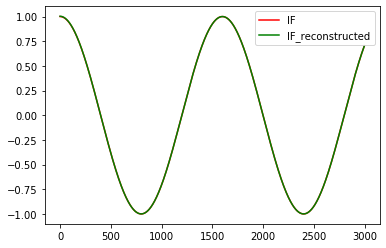

In [14]:
plt.figure()
plt.plot(IF.ys.real[:3000], color = 'red', label = 'IF')
plt.plot(IF_reconstructed.ys.real[:3000], color = 'green', label = 'IF_reconstructed')
plt.legend();

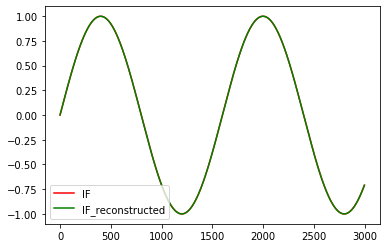

In [15]:
plt.figure()
plt.plot(IF.ys.imag[:3000], color = 'red', label = 'IF')
plt.plot(IF_reconstructed.ys.imag[:3000], color = 'green', label = 'IF_reconstructed')
plt.legend();

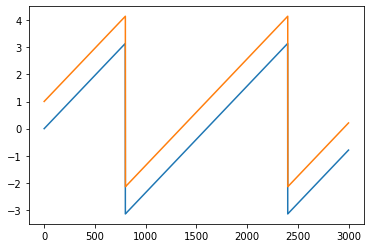

In [16]:
plt.figure()
plt.plot(np.angle(IF.ys)[:3000]);
plt.plot(np.angle(IF_reconstructed.ys)[:3000]+1);

array([-0.00318327-0.0019599j , -0.00317554-0.00195268j,
       -0.00316778-0.00194544j, ..., -0.00316778+0.00194544j,
       -0.00317554+0.00195268j, -0.00318327+0.0019599j ])

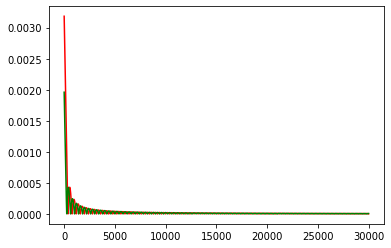

In [17]:
dif = (IF.ys -IF_reconstructed.ys)
plt.plot(np.abs(dif.real)[:30000], 'r');
plt.plot(np.abs(dif.imag)[:30000], 'g');
dif